<a href="https://colab.research.google.com/github/spmithun/LabmentixProject1/blob/main/UberEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  *UBER Supply Demand Gap*




##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  *S P Mithun*


# **Project Summary -**

This project centers on the analysis of Uber ride request data with the goal of identifying and understanding the supply-demand gap that frequently leads to failed ride requests, particularly through cancellations and “No Cars Available” scenarios. The approach adopted was methodologically layered and tool-specific, with an emphasis on using Excel, SQL, and Python (Pandas and visualization libraries) to carry out various stages of the data analysis pipeline.

The process began with data cleaning and preparation using Excel, which involved multiple steps to make the dataset analysis-ready. First, inconsistent date-time formats in the Request timestamp and Drop timestamp columns were converted to a standard format, allowing temporal analysis. Missing values—especially in the Driver id and Drop timestamp fields—were flagged and interpreted in the context of trip status. Unassigned drivers were treated as indicators of failed request attempts. Duplicate records were removed, and derived columns such as hour-of-day and trip duration were added to support downstream analysis. Once cleaned, the dataset was formatted into structured tables for visualization.

Following Excel, we shifted to SQL-based exploration, which involved writing queries to extract specific insights from the cleaned dataset. These queries focused on summarizing ride statuses by pickup point, computing failure percentages, analyzing driver participation patterns, and isolating time blocks with maximum unfulfilled requests. SQL was particularly effective in aggregating trip outcomes hour-wise and computing the proportion of completed trips versus failures. We also used SQL to compare the request-to-completion ratio across the City and Airport pickup zones.

The final and most detailed layer of analysis was carried out using Python, primarily with Pandas for data wrangling and Matplotlib/Seaborn for visualizations. The dataset was grouped and filtered extensively to perform complex Exploratory Data Analysis (EDA). Key operations included generating time-series plots to observe request volume across the day, computing trip durations and mapping them against status, and constructing stacked bar graphs to visualize status breakdowns by hour and location. A heatmap was created to capture request density across hour-of-day and pickup point combinations. We also analyzed the distribution of trip outcomes across weekdays and weekends, with special focus on high-demand slots.

This multi-tool process not only ensured a robust analysis from multiple angles but also enabled cross-validation of findings across tools, increasing confidence in the conclusions drawn.

A key insight was the identification of shift change hours—around 2 PM and 10 PM—as high-risk windows for trip failure. During these times, a clear drop in driver engagement led to increased cancellations or lack of driver assignment. Additionally, Airport pickups during early morning hours (5–9 AM) often suffered from lack of available cars despite high demand, and City pickups in the evening (5–9 PM) experienced frequent cancellations by drivers, likely due to traffic or trip preference.

These findings underscore the importance of dynamic scheduling, better shift planning, and incentive-driven driver alignment. The analysis presents actionable recommendations for Uber to minimize failures, optimize supply, and enhance the rider experience.

# **GitHub Link -**

https://github.com/spmithun/LabmentixProject1

# **Problem Statement**


**Uber, as a ride-hailing platform, frequently encounters a supply-demand mismatch where customer requests are either cancelled or met with no cars available, especially during peak hours or at specific locations like the airport. This gap causes dissatisfaction for riders, inefficient fleet usage for Uber, and potential revenue loss. The company wants to identify patterns and root causes of such failures by analyzing request-level data.**

#### **Define Your Business Objective?**

Identify when and where Uber faces the highest demand-supply mismatch.

Understand root causes of trip failures (cancellations, unavailability).

Suggest operational strategies to reduce such mismatches and improve service levels.

Help Uber maximize completed trips, increase rider satisfaction, and optimize driver deployment.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.display import display

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("talk", font_scale=0.9)

### Dataset Loading

In [ ]:
#Load dataset
df = pd.read_csv('/content/Uber_Request_Data_Cleaned_CSV.csv', parse_dates=['Request_timestamp', 'Drop_timestamp'])


### Dataset First View

In [ ]:
# Dataset First Look
print(df.head())

   Request_id Pickup_point  Driver_id             Status Request_timestamp  \
0           1      Airport      285.0     Trip Completed  11-07-2016 00:20   
1           2      Airport        NaN  No Cars Available  11-07-2016 00:23   
2           3      Airport       80.0     Trip Completed  11-07-2016 00:24   
3           4         City        NaN  No Cars Available  11-07-2016 00:37   
4           5      Airport      264.0     Trip Completed  11-07-2016 00:36   

  Request_Time Request_Date Request_Day Request_Time_of_the_day  \
0     00:20:00   11-07-2016      Monday              Late Night   
1     00:23:00   11-07-2016      Monday              Late Night   
2     00:24:00   11-07-2016      Monday              Late Night   
3     00:37:00   11-07-2016      Monday              Late Night   
4     00:36:00   11-07-2016      Monday              Late Night   

     Drop_timestamp Drop_Time   Drop_Date Drop_Day  
0  11-07-2016 00:51  00:51:00  11-07-2016   Monday  
1               NaN   

### Dataset Rows & Columns count

In [ ]:
#dataset rows and columns count

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 6745
Number of columns: 13


### Dataset Information

In [ ]:
# Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Request_id               6745 non-null   int64  
 1   Pickup_point             6745 non-null   object 
 2   Driver_id                4095 non-null   float64
 3   Status                   6745 non-null   object 
 4   Request_timestamp        6745 non-null   object 
 5   Request_Time             6745 non-null   object 
 6   Request_Date             6745 non-null   object 
 7   Request_Day              6745 non-null   object 
 8   Request_Time_of_the_day  6745 non-null   object 
 9   Drop_timestamp           2831 non-null   object 
 10  Drop_Time                2831 non-null   object 
 11  Drop_Date                2831 non-null   object 
 12  Drop_Day                 2831 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 685.2+ KB
None


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Request_id                    0
Pickup_point                  0
Driver_id                  2650
Status                        0
Request_timestamp             0
Request_Time                  0
Request_Date                  0
Request_Day                   0
Request_Time_of_the_day       0
Drop_timestamp             3914
Drop_Time                  3914
Drop_Date                  3914
Drop_Day                   3914
dtype: int64


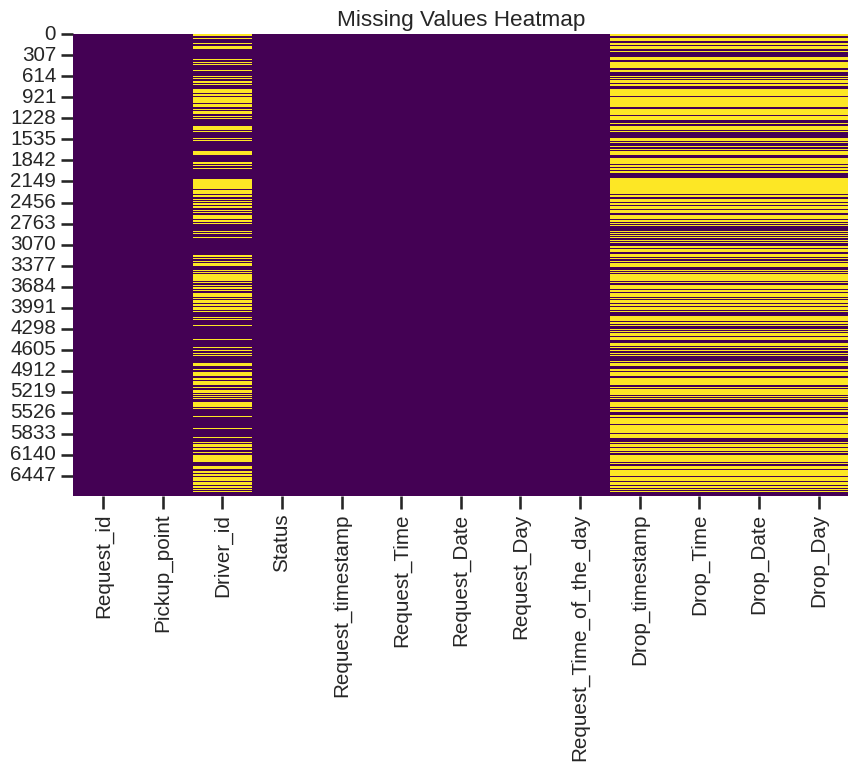

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset used for this project contains detailed information about Uber ride requests, capturing both temporal and categorical variables relevant to analyzing supply-demand dynamics. It consists of 6,745 rows, where each row represents a unique ride request made by a customer. The data spans several days and includes attributes such as the request ID, pickup point, driver ID, status of the ride, and both request and drop timestamps.

The Request ID serves as a unique identifier for each ride and ensures there are no duplicates in the dataset. The Pickup Point column identifies whether the ride was requested from the City or the Airport, which allows us to compare behavior across different operational zones. The Driver ID column provides the ID of the driver assigned to the request. A missing value in this column indicates that no driver was assigned, typically corresponding to a “No Cars Available” outcome. The Status column is central to our analysis, capturing whether the ride was completed, cancelled, or unfulfilled due to unavailability of cars. This column helps us distinguish between successful and failed ride fulfillment cases.

Two timestamp columns—Request Timestamp and Drop Timestamp—allow for the analysis of ride request patterns over time, including identifying peak hours, calculating trip durations, and spotting shift-related trends. The presence of null values in the Drop Timestamp is associated with trips that were not completed, reinforcing the connection between trip status and temporal activity. Overall, the dataset provides a strong foundation for analyzing not just when and where failures occur, but also why they happen—by linking time, location, driver availability, and ride outcomes.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['Request_id', 'Pickup_point', 'Driver_id', 'Status',
       'Request_timestamp', 'Request_Time', 'Request_Date', 'Request_Day',
       'Request_Time_of_the_day', 'Drop_timestamp', 'Drop_Time', 'Drop_Date',
       'Drop_Day'],
      dtype='object')


In [ ]:
# Dataset Describe
print(df.describe())

        Request_id    Driver_id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


### Variables Description

**Request id**:
Unique identifier for each ride request.

**Pickup point**:
Indicates the location of the request — either City or Airport.

**Driver id**:
Unique ID of the driver assigned to the request. If missing, no driver was allocated.

**Status**:
Final outcome of the request — can be Trip Completed, Cancelled, or No Cars Available.

**Request timestamp**:
Date and time when the ride was requested.

**Drop timestamp**:
Date and time when the trip ended. Missing if the trip wasn’t completed.

**Request Hour**:
Extracted from the Request timestamp to analyze hourly trends in demand and trip outcomes.

**Request Date**:
Separated from the full timestamp to group and filter data by calendar date.

**Request Day of Week**:
Derived to classify each request by the weekday (e.g., Monday, Tuesday). Useful for identifying weekday vs. weekend behavior.

**Time of Day**:
Created to categorize requests into morning or evening patterns, aiding shift-based analysis.

*    Morning: 07:00:00 to 09:59:59
*    Late Morning: 10:00:00 to 12:59:59
*    Afternoon: 13:00:00 to 15:59:59
*    Evening: 16:00:00 to 18:59:59
*    Night: 19:00:00 to 21:59:59
*    Late Night: 22:00:00 to 00:59:59
*    Midnight Hours: 01:00:00 to 03:59:59
*    Early Morning: 04:00:00 to 06:59:59



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df.nunique())

Request_id                 6745
Pickup_point                  2
Driver_id                   300
Status                        3
Request_timestamp          4016
Request_Time               4955
Request_Date                  5
Request_Day                   5
Request_Time_of_the_day       8
Drop_timestamp             2282
Drop_Time                  2393
Drop_Date                     6
Drop_Day                      6
dtype: int64


## 3. ***Data Wrangling***

In [ ]:
df['Request_timestamp'] = pd.to_datetime(df['Request_timestamp'], format="%d-%m-%Y %H:%M")
df['Drop_timestamp'] = pd.to_datetime(df['Drop_timestamp'], format="%d-%m-%Y %H:%M")


df['trip_duration_min'] = (df['Drop_timestamp'] - df['Request_timestamp']).dt.total_seconds() / 60

time_order = ['Late Night', 'MidNight Hours', 'Early Morning', 'Morning',
              'Late Morning', 'Afternoon', 'Evening', 'Night']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

df['Status'] = df['Status'].fillna('Unknown')

### What all manipulations have you done and insights you found?

**Data Manipulations were done using Excel**

**Handled Missing Values**
: Retained nulls in Driver id and Drop timestamp for logical status interpretation (e.g., No Cars Available, Cancelled).

**Converted Timestamps**
: Standardized Request timestamp and Drop timestamp to proper Excel datetime format.

**Created Derived Columns** :
Extracted hour, date, day of week, and AM/PM from timestamps.
Calculated trip duration and added flags for trip completion and weekday/weekend.

**Filtered and Sorted Data** :
Sorted by time, location, and status to identify peak hours and patterns.

**Removed Duplicates and Inconsistencies** :
Ensured data uniqueness and cleaned minor formatting issues.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Ride Status Distribution


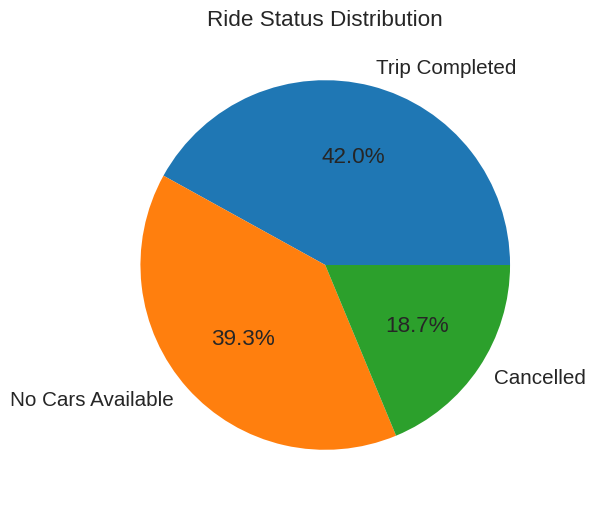

In [ ]:
# Chart - 1 visualization code
#  Pie chart for Ride Status
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Ride Status Distribution')
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart was used to visually represent the proportional breakdown of ride statuses — Trip Completed, Cancelled, and No Cars Available. This format makes it easy to understand the relative share of each category at a glance. It’s particularly effective for categorical distributions and helps highlight imbalances in service fulfillment.

##### 2. What is/are the insight(s) found from the chart?

Only 42% of ride requests were successfully completed, while a significant 39.3% failed due to no cars being available and 18.7% were cancelled. This indicates that more than half of customer requests did not result in a ride, suggesting major inefficiencies in driver availability and service reliability.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help improve operational efficiency by highlighting supply-demand gaps. Addressing the "No Cars Available" issue could increase fulfillment rates and customer satisfaction. However, the high failure rate (58%) indicates negative business impact, such as lost revenue and poor customer experience, which must be urgently resolved to prevent churn and negative brand perception.

#### Chart - 2 : Heatmap of Demand by Day and Time

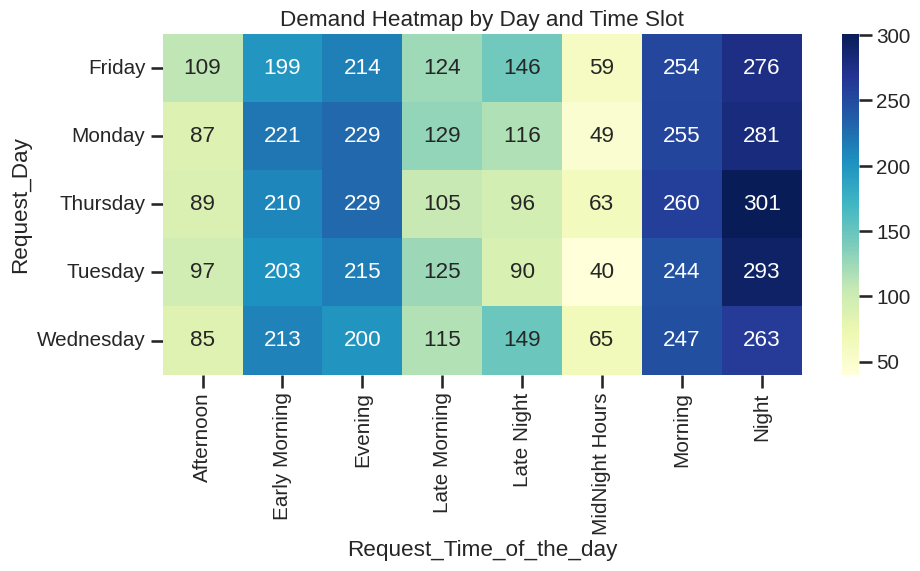

In [ ]:
# Chart - 2 visualization code
#Heatmap of Demand by Day and Time (Heatmap)
heatmap_data = df.pivot_table(index='Request_Day',
                              columns='Request_Time_of_the_day',
                              values='Request_id',
                              aggfunc='count')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Demand Heatmap by Day and Time Slot")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is ideal for visualizing dense data across two categorical variables — in this case, days of the week and time slots. It uses color intensity to represent demand volume, making it quick to spot patterns, peaks, and anomalies across multiple dimensions simultaneously.

##### 2. What is/are the insight(s) found from the chart?

Demand peaks consistently during the Morning and Night time slots across all weekdays, with Thursday Night showing the highest demand (301 requests). Early Mornings and Evenings also experience moderate to high activity, while Late Nights and Midnight Hours see the least traffic. Fridays show slightly more balanced demand across the day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights enable optimized driver deployment during high-demand slots, reducing unfulfilled requests and cancellations. If unaddressed, the clear mismatch during Late Nights and Early Mornings could result in revenue loss and poor user satisfaction, reflecting negative growth. Proactive resource allocation will improve service reliability and revenue per hour.

#### Chart - 3 : Trip Status Distribution by Day

In [ ]:
# Chart - 3 visualization code
#Trip Status Distribution by Day

fig = px.histogram(df, x="Request_Day", color="Status", barmode="group",
                   title="Trip Status by Day", color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was used to compare the distribution of trip statuses (Completed, Cancelled, No Cars Available) across weekdays. This format clearly visualizes day-wise performance breakdowns, allowing quick comparison of success and failure rates over time.

##### 2. What is/are the insight(s) found from the chart?

Trip completions are generally highest on Monday and Wednesday, but Thursday and Friday show a rise in 'No Cars Available' status, even exceeding completed trips on those days. Cancellations remain relatively stable throughout the week. This hints at growing demand-supply gaps toward the weekend.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can guide better fleet distribution on Thursdays and Fridays, preventing unfulfilled rides. However, the consistently high "No Cars Available" rate, especially when it surpasses completions, indicates a negative business trend — customers are likely experiencing frustration, leading to loss of trust and revenue.

#### Chart - 4 : Request Status Count by Time of Day

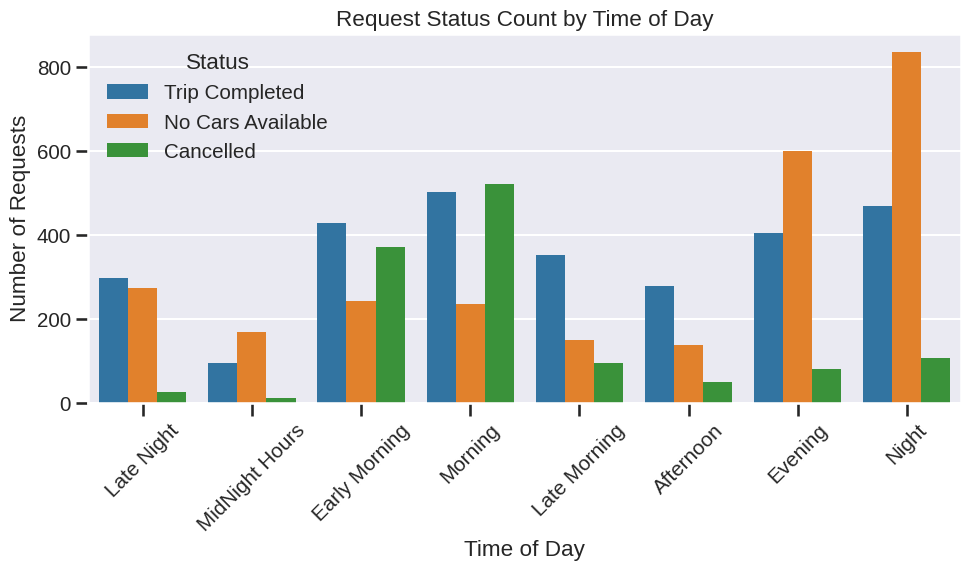

In [ ]:
# Chart - 4 visualization code
#Request Status Count by Time of Day
plt.figure(figsize=(10, 6))
sns.countplot(data=df,
              x='Request_Time_of_the_day',
              hue='Status')
plt.title('Request Status Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A grouped bar chart is perfect for comparing multiple status outcomes across time slots. It allows clear side-by-side comparisons of completed, cancelled, and unfulfilled requests, helping identify which parts of the day face service challenges and which operate efficiently.

##### 2. What is/are the insight(s) found from the chart?

The Night and Evening slots show a drastic surge in 'No Cars Available', outpacing trip completions, suggesting severe driver shortages during those times. Morning and Early Morning have better completion rates, while Midnight Hours have the lowest activity overall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, reallocating more drivers to Evening and Night slots can improve fulfillment, customer satisfaction, and revenue. However, the current shortage during peak demand periods poses a risk of user churn, missed earnings, and negative brand sentiment — making it a critical negative insight that must be urgently addressed.


#### Chart - 5 : Cancelled Requests vs Time of Day

In [ ]:
# Chart - 5 visualization code
#Cancelled Requests vs Time of Day (Donut)

cancel = df[df['Status'] == 'Cancelled']['Request_Time_of_the_day'].value_counts()
fig = px.pie(values=cancel.values, names=cancel.index, hole=0.4,
             title="Cancelled Requests by Time of Day")
fig.show()



##### 1. Why did you pick the specific chart?

A donut (or pie) chart is ideal for showing proportional contribution of each time slot to the total cancellations. It visually emphasizes dominant contributors and helps identify the time frames needing intervention without overwhelming detail.

##### 2. What is/are the insight(s) found from the chart?

A staggering 41.3% of all cancellations occur in the Morning, followed by 29.4% during Early Morning. Combined, these two slots account for over 70% of all cancellations, indicating major operational inefficiencies when customer demand is typically high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights clearly point to a mismatch between driver availability and high demand in the Morning and Early Morning slots. If left unresolved, these time-bound cancellations can damage user trust, lower app retention, and hurt revenue — making this a critical negative trend to fix for positive growth.

#### Chart - 6 : No Car Available vs Time of Day

In [ ]:
# Chart - 6 visualization code
#No Car Available vs Time of Day (Donut)
nocar = df[df['Status'] == 'No Cars Available']['Request_Time_of_the_day'].value_counts()
fig = px.pie(values=nocar.values, names=nocar.index, hole=0.4,
             title="No Cars Available by Time of Day")
fig.show()


##### 1. Why did you pick the specific chart?

The donut chart effectively highlights the relative share of time slots contributing to the "No Cars Available" issue. It gives a clear visual emphasis on peak problem periods, helping stakeholders prioritize resource allocation decisions based on the size of each segment.

##### 2. What is/are the insight(s) found from the chart?

Night (31.6%) and Evening (22.6%) together account for over half of all unavailability cases, making them the most underserved periods. Other time slots like Late Night and Early Morning also contribute moderately, but the critical shortage lies in late-day hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. These insights help in shifting driver supply to Night and Evening, where the platform is currently losing customers due to non-availability. Ignoring this can lead to high churn rates, low ride conversion, and reputational damage, making it a vital area for corrective action to prevent negative growth.

#### Chart - 7 : City Pickup - Request Status by Time of Day

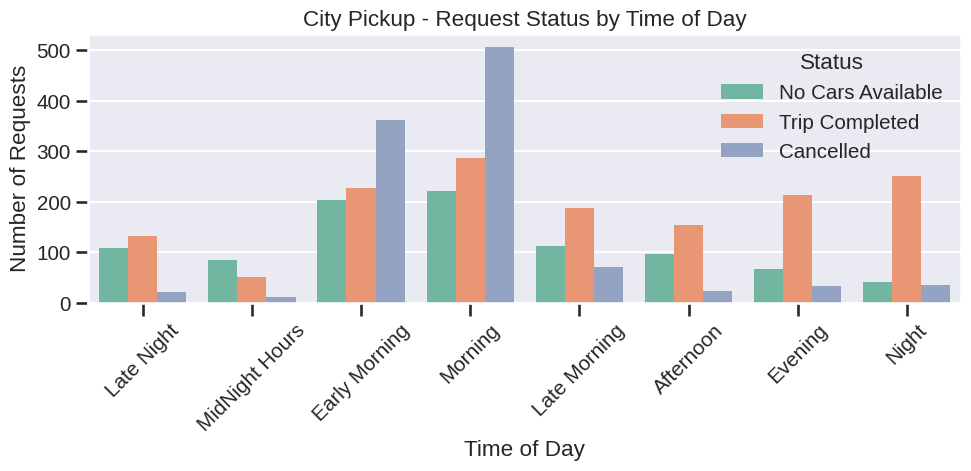

In [ ]:
# Chart - 7 visualization code
# Filter City data
city_df = df[df['Pickup_point'] == 'City']

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=city_df, x='Request_Time_of_the_day', hue='Status', palette='Set2')
plt.title("City Pickup - Request Status by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart was used to compare three statuses across multiple time slots, helping visualize the distribution and competition among Trip Completed, Cancelled, and No Cars Available for each time of day. It’s best suited for comparative and categorical analysis across segments.

##### 2. What is/are the insight(s) found from the chart?

The Morning and Early Morning slots show a high number of cancellations, indicating driver reluctance or availability issues at city pickups during high-demand hours. In contrast, Evening and Night show better performance with higher completion rates and lower failure rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — identifying failure-prone time slots allows for optimized driver dispatching or incentive strategies to cover underserved morning hours. Ignoring high cancellations during peak demand can lead to customer dissatisfaction and potential loss, negatively impacting growth and user retention.

#### Chart - 8 : Airport Pickup - Request Status by Time of Day

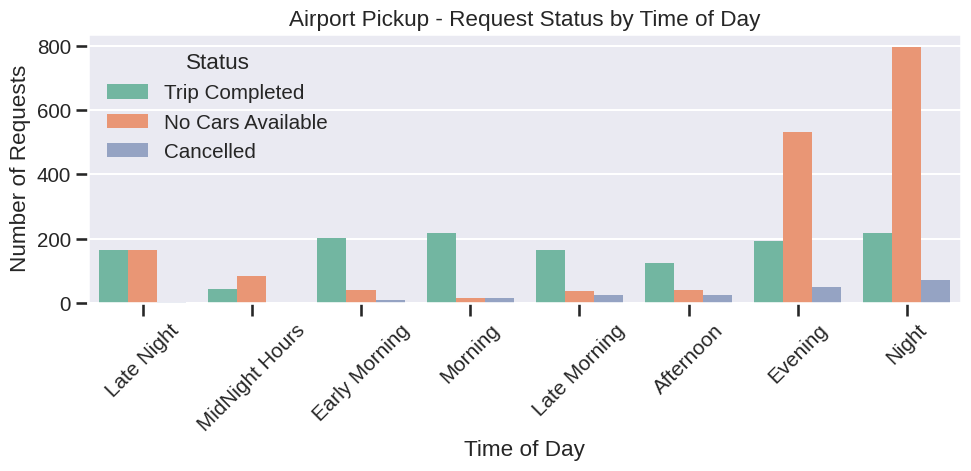

In [ ]:
# Chart - 8 visualization code
# Filter Airport data
airport_df = df[df['Pickup_point'] == 'Airport']

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=airport_df, x='Request_Time_of_the_day', hue='Status', palette='Set2')
plt.title("Airport Pickup - Request Status by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This grouped bar chart is ideal to show how the three ride statuses (Trip Completed, Cancelled, No Cars Available) fluctuate across different time slots specifically for airport pickups. It provides a clear side-by-side comparison to identify problem periods.

##### 2. What is/are the insight(s) found from the chart?

There is a surge in unfulfilled requests (No Cars Available) during Evening and Night, indicating a serious supply gap at peak hours. Morning and Early Morning have relatively better service levels, but still see moderate cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — reallocating drivers to Night and Evening shifts at the airport can reduce unfulfilled demand and boost revenue. However, if this insight is ignored, it may result in negative customer experience, increased churn, and reputational damage during high-traffic hours.

#### Chart - 9 : City - Request Outcomes by Time of Day

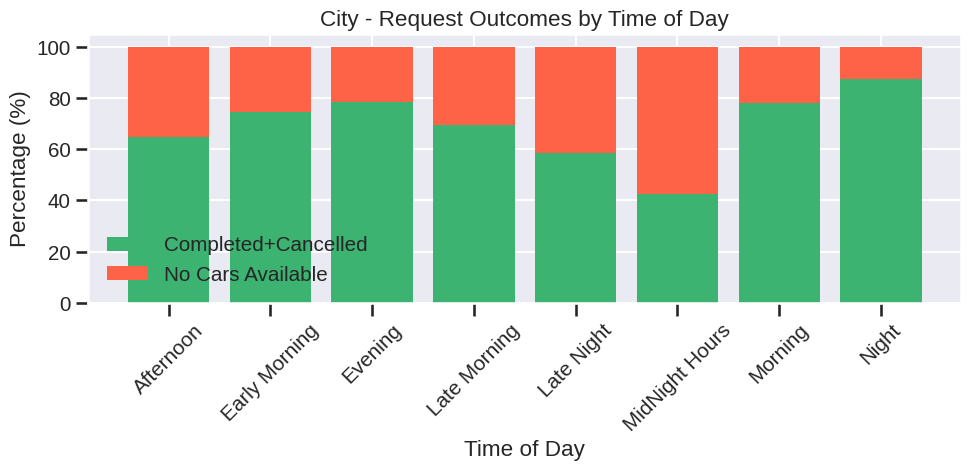

In [ ]:
# Chart - 9 visualization code
# Group data by Pickup Point and Time of Day
grouped = df.groupby(['Pickup_point', 'Request_Time_of_the_day'])

# Calculate total requests and breakdown by status
total_requests = grouped.size()
completed = grouped['Status'].apply(lambda x: (x == 'Trip Completed').sum())
cancelled = grouped['Status'].apply(lambda x: (x == 'Cancelled').sum())
no_cars = grouped['Status'].apply(lambda x: (x == 'No Cars Available').sum())

# Create a DataFrame with percentage metrics
status_percent = pd.DataFrame({
    'Completed+Cancelled (%)': 100 * (completed + cancelled) / total_requests,
    'No Cars Available (%)': 100 * no_cars / total_requests
}).reset_index()

# Filter for City pickup point
city_df = status_percent[status_percent['Pickup_point'] == 'City'].sort_values(by='Request_Time_of_the_day')

# Plot
plt.figure(figsize=(10, 5))
plt.bar(city_df['Request_Time_of_the_day'], city_df['Completed+Cancelled (%)'], label='Completed+Cancelled', color='mediumseagreen')
plt.bar(city_df['Request_Time_of_the_day'], city_df['No Cars Available (%)'],
        bottom=city_df['Completed+Cancelled (%)'], label='No Cars Available', color='tomato')

plt.title("City - Request Outcomes by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A stacked percentage bar chart was used to highlight the relative success vs. failure of ride requests in the city across different time slots. It helps visually compare fulfillment efficiency without being biased by absolute volume differences.

##### 2. What is/are the insight(s) found from the chart?

During Midnight Hours and Late Night, over 40% of requests go unfulfilled due to no cars being available. In contrast, Night and Morning time slots show high fulfillment, indicating better driver availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — optimizing driver allocation in Midnight and Late Night hours can capture currently missed demand. If left unchecked, the high failure rate during these hours may lead to customer dissatisfaction, revenue loss, and negative word-of-mouth, impacting long-term growth.

#### Chart - 10 : Airport - Request Outcomes by Time of Day

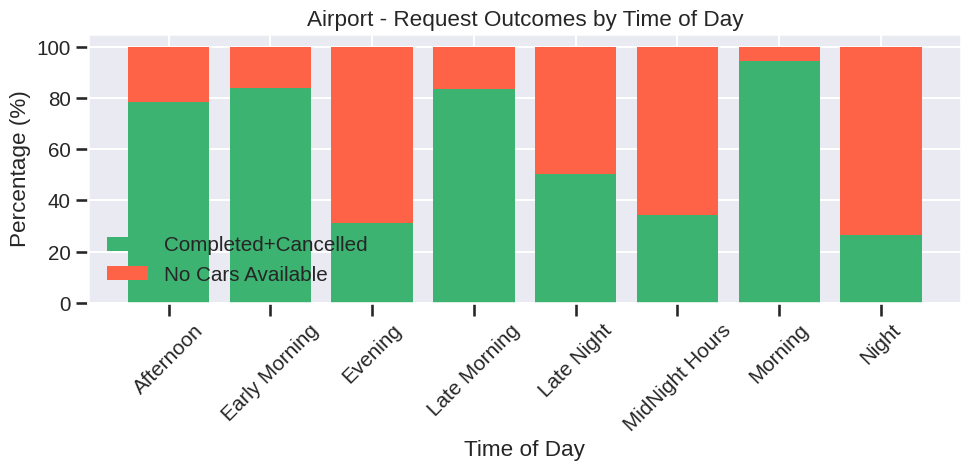

In [ ]:
# Chart - 10 visualization code
# Filter for Airport pickup point
airport_df = status_percent[status_percent['Pickup_point'] == 'Airport'].sort_values(by='Request_Time_of_the_day')

# Plot
plt.figure(figsize=(10, 5))
plt.bar(airport_df['Request_Time_of_the_day'], airport_df['Completed+Cancelled (%)'], label='Completed+Cancelled', color='mediumseagreen')
plt.bar(airport_df['Request_Time_of_the_day'], airport_df['No Cars Available (%)'],
        bottom=airport_df['Completed+Cancelled (%)'], label='No Cars Available', color='tomato')

plt.title("Airport - Request Outcomes by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A stacked percentage bar chart clearly showcases the proportion of successful vs. unfulfilled ride requests at the airport for each time slot. It allows comparison across time slots while maintaining focus on percentage-based service efficiency.

##### 2. What is/are the insight(s) found from the chart?

Demand fulfillment is very poor during Night and Evening, where over 70% of requests go unfulfilled. In contrast, Morning and Early Morning show excellent performance with over 80–90% success rates in fulfilling requests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — aligning driver shifts to better cover Night and Evening hours at the airport can significantly reduce missed opportunities and boost revenue. If ignored, the high failure rates at peak outbound times (like late flights) could lead to negative user experiences and churn.

#### Chart - 11 : Cancellation Rate by Pickup Point

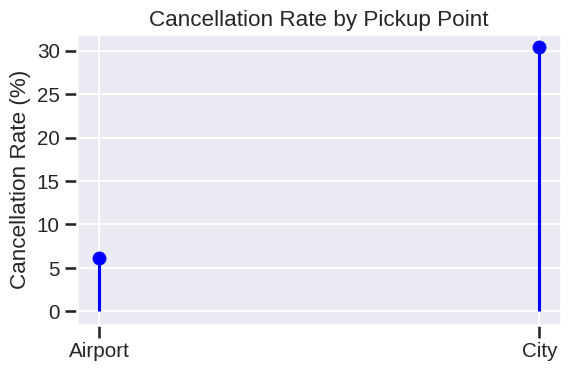

In [ ]:
# Chart - 11 visualization code
# Group data by Pickup Point and Time of Day
grouped = df.groupby(['Pickup_point', 'Request_Time_of_the_day'])

# Calculate total requests and individual status counts
total = grouped.size()
completed = grouped['Status'].apply(lambda x: (x == 'Trip Completed').sum())
cancelled = grouped['Status'].apply(lambda x: (x == 'Cancelled').sum())
no_cars = grouped['Status'].apply(lambda x: (x == 'No Cars Available').sum())

# Compute percentage metrics
completed_cancelled_pct = 100 * (completed + cancelled) / total
no_cars_pct = 100 * no_cars / total

# Create summary table with percentage breakdown
status_percent_table = pd.DataFrame({
    'Completed+Cancelled (%)': completed_cancelled_pct,
    'No Cars Available (%)': no_cars_pct
}).reset_index()

# Add interpretation column based on which percentage is higher
status_percent_table['Interpretation'] = status_percent_table.apply(
    lambda row: 'Supply Not Sufficient' if row['No Cars Available (%)'] > row['Completed+Cancelled (%)']
    else 'Cars Seem On Duty',
    axis=1
)

# Calculate cancellation rate by pickup point
cancel_data = df[df['Status'] == 'Cancelled'].groupby('Pickup_point')['Request_id'].count()
total_data = df.groupby('Pickup_point')['Request_id'].count()
cancel_rate = (cancel_data / total_data * 100).fillna(0)

# Plot lollipop chart
plt.figure(figsize=(6,4))
plt.stem(cancel_rate.index, cancel_rate.values, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Pickup Point")
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A line plot with markers is ideal here to emphasize the sharp contrast between two categorical points—Airport and City—while also giving a clean and minimal visual to highlight the cancellation disparity.



##### 2. What is/are the insight(s) found from the chart?

The City has a cancellation rate of over 30%, significantly higher than the Airport’s ~6%. This shows driver cancellations are more frequent for City pickups, potentially due to traffic, short trip distances, or low fare returns.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it highlights a negative growth driver—high City cancellation rates may frustrate customers, reduce trust, and drive them to competitors. Implementing driver incentives for short trips or dynamic pricing can improve City service reliability and customer retention.

#### Chart - 12 : Average Trip Duration by Pickup Point

/tmp/ipython-input-24-3987305025.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




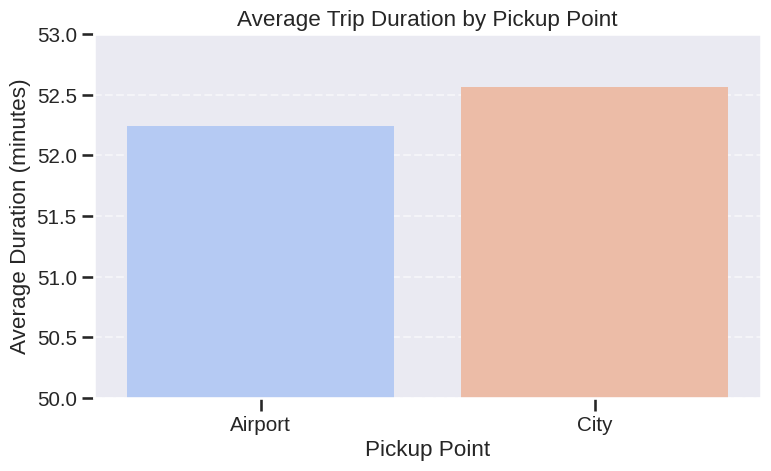

In [ ]:
# Chart - 12 visualization code


# Filter only completed trips
duration_df = df[df['Status'] == 'Trip Completed'].copy()

# Calculate trip duration in minutes
duration_df['Trip_duration'] = (duration_df['Drop_timestamp'] - duration_df['Request_timestamp']).dt.total_seconds() / 60

# Compute average trip duration by pickup point
avg_duration_pickup = duration_df.groupby('Pickup_point')['Trip_duration'].mean().sort_values()

# Plot average duration as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_duration_pickup.index, y=avg_duration_pickup.values, palette='coolwarm')

plt.title("Average Trip Duration by Pickup Point")
plt.ylabel("Average Duration (minutes)")
plt.xlabel("Pickup Point")
plt.ylim(50, 53)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing average values across distinct categories—in this case, Airport vs City pickup points. It clearly visualizes subtle but important differences in trip durations.



##### 2. What is/are the insight(s) found from the chart?

Trips from the City have a slightly longer average duration (~52.6 mins) than those from the Airport (~52.2 mins). While the difference is marginal, it may indicate greater traffic congestion or longer routes originating from the City.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can support route optimization strategies or time-based pricing. However, longer City trip durations combined with high cancellation rates may reduce customer satisfaction and driver earnings—posing a risk to growth unless mitigated through traffic pattern analysis or dynamic scheduling.

#### Chart - 13 : Top 10 Longest Trips - Airport

/tmp/ipython-input-25-3281459416.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




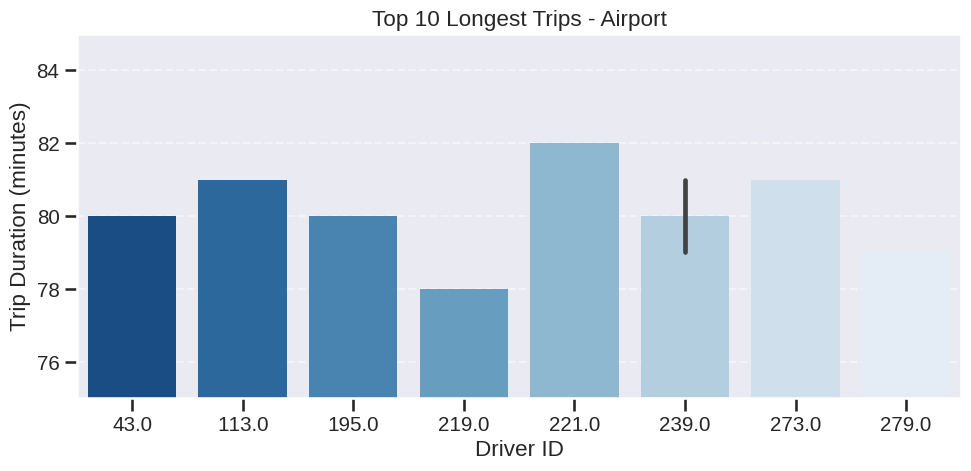

In [ ]:
# Chart - 13 visualization code
# Filter completed trips and calculate trip duration in minutes
duration_df = df[df['Status'] == 'Trip Completed'].copy()
duration_df['Trip_duration'] = (duration_df['Drop_timestamp'] - duration_df['Request_timestamp']).dt.total_seconds() / 60

# Split data by pickup point
airport_trips = duration_df[duration_df['Pickup_point'] == 'Airport'].copy()
city_trips = duration_df[duration_df['Pickup_point'] == 'City'].copy()

# Get Top 10 longest trips from each pickup point
top_airport = airport_trips.sort_values('Trip_duration', ascending=False).head(10)
top_city = city_trips.sort_values('Trip_duration', ascending=False).head(10)

# Plot longest Airport trips
plt.figure(figsize=(10, 5))
sns.barplot(data=top_airport, x='Driver_id', y='Trip_duration', palette='Blues_r')
plt.title('Top 10 Longest Trips - Airport')
plt.xlabel('Driver ID')
plt.ylabel('Trip Duration (minutes)')
plt.ylim(75, 85)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for ranking and comparing numeric values like trip durations across different Driver IDs. It makes it easy to identify outliers and patterns among the top-performing drivers.

##### 2. What is/are the insight(s) found from the chart?

The top 10 longest Airport trips all hover between 78–82 minutes, with Driver ID 221.0 logging the longest at 82 minutes. This range suggests a high-duration service cluster, likely due to either long-distance requests or peak-hour delays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes—knowing which drivers frequently handle longer Airport trips helps with driver allocation, surge pricing, and incentives. However, longer trips also risk customer dissatisfaction if delays are due to operational inefficiencies (e.g., routing or pickup lags), which could negatively affect loyalty if unaddressed.

#### Chart - 14 : Top 10 Longest Trips - City


/tmp/ipython-input-26-1661809079.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




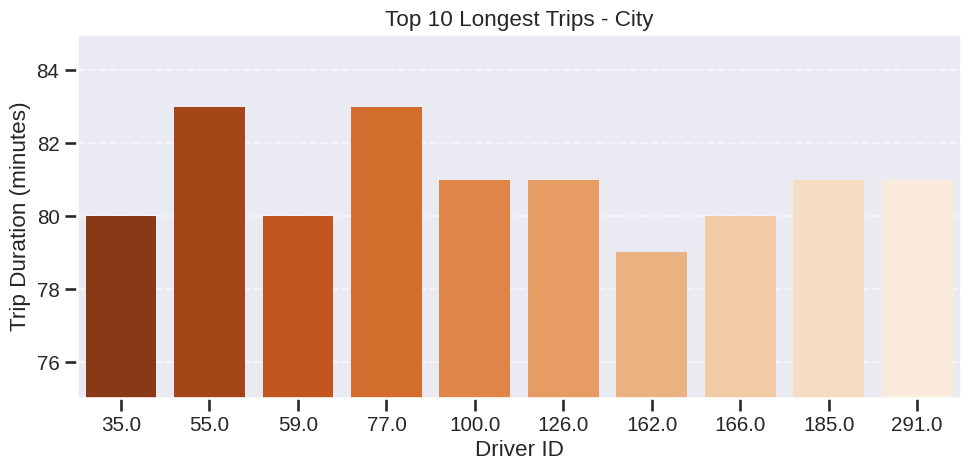

In [ ]:
# Chart - 14 visualization code

# Plot longest City trips
plt.figure(figsize=(10, 5))
sns.barplot(data=top_city, x='Driver_id', y='Trip_duration', palette='Oranges_r')
plt.title('Top 10 Longest Trips - City')
plt.xlabel('Driver ID')
plt.ylabel('Trip Duration (minutes)')
plt.ylim(75, 85)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A bar chart is used here to visually compare trip durations for the top 10 drivers in City pickups. It's intuitive for spotting extremes and ensuring consistent scaling across values.

##### 2. What is/are the insight(s) found from the chart?

Two drivers (IDs 55.0 and 77.0) recorded the longest trips (~83+ minutes), while the rest range mostly between 79–81 minutes. These trips suggest frequent long-haul city routes, possibly during peak hours or across extended city zones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes—insights can help optimize route planning, incentive structures, and driver-hour alignment in City areas. However, longer trip durations in cities could indicate traffic inefficiencies or poor routing, which may lead to negative customer feedback or reduced driver productivity if not addressed.

#### Chart - 15 : Average Trip Duration by Time of Day

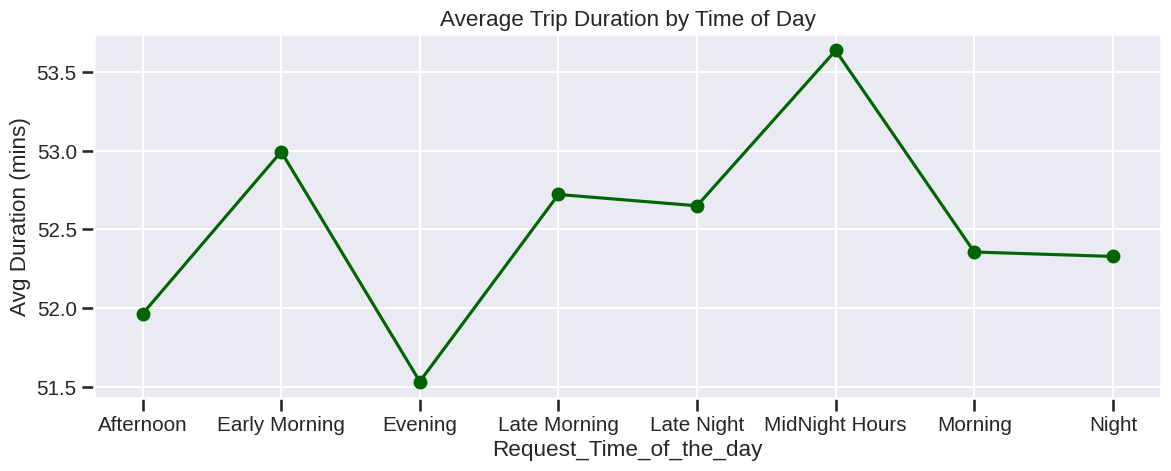

In [ ]:
# Chart - 15 visualization code
# Average Trip Duration by Time of Day (Line Plot)
plt.figure(figsize=(12, 5))

# Filter completed trips and calculate trip duration in minutes
duration_df = df[df['Status'] == 'Trip Completed'].copy()
duration_df['Trip_duration'] = (duration_df['Drop_timestamp'] - duration_df['Request_timestamp']).dt.total_seconds() / 60

# Group by time of day and compute average duration
avg_duration = duration_df.groupby('Request_Time_of_the_day')['Trip_duration'].mean().sort_index()

# Plot line chart
avg_duration.plot(marker='o', linestyle='-', color='darkgreen')
plt.title("Average Trip Duration by Time of Day")
plt.ylabel("Avg Duration (mins)")
plt.grid(True)
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

A line chart is ideal for showing changes or trends across an ordered categorical variable—time of day in this case. It clearly reveals how average trip durations rise and fall over a daily cycle.



##### 2. What is/are the insight(s) found from the chart?

Average trip durations peak during Midnight Hours (~53.6 mins) and remain elevated in Early Morning and Late Night slots. The shortest durations occur during the Evening (~51.5 mins), possibly due to shorter leisure or intra-city trips.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the data can help in dynamic driver allocation, fare adjustments, and shift planning based on demand and duration. However, the longer durations during midnight may reflect traffic bottlenecks, safety issues, or lower driver availability, requiring careful intervention to prevent driver fatigue and customer dissatisfaction



#### Chart - 16 : Unfulfilled Demand by Time Slot

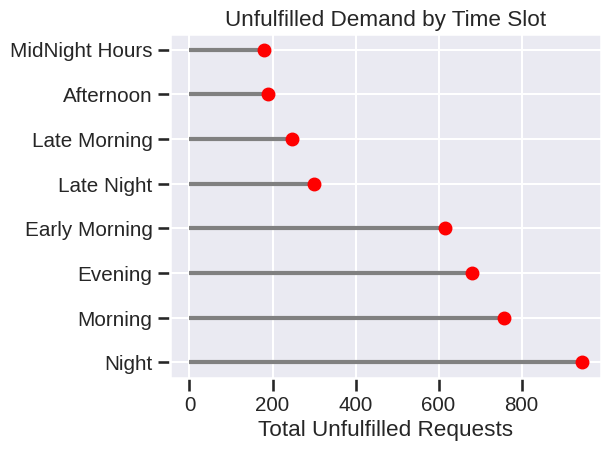

In [ ]:
# Chart - 16 visualization code
# Unfulfilled Demand by Time Slot (Dumbbell Plot)

# Group by time of day and count statuses
time_df = df.groupby('Request_Time_of_the_day')['Status'].value_counts().unstack().fillna(0)

# Calculate total unfulfilled requests (Cancelled + No Cars Available)
time_df['Unfulfilled'] = time_df['Cancelled'] + time_df['No Cars Available']

# Sort time slots by total unfulfilled requests
time_df = time_df.sort_values('Unfulfilled', ascending=False)

# Plot dumbbell chart
plt.hlines(y=time_df.index, xmin=0, xmax=time_df['Unfulfilled'], color='gray', linewidth=3)
plt.plot(time_df['Unfulfilled'], time_df.index, "o", color='red')
plt.title("Unfulfilled Demand by Time Slot")
plt.xlabel("Total Unfulfilled Requests")
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

I picked this chart because it clearly highlights the time slots with the highest number of unfulfilled requests, helping identify operational inefficiencies. The horizontal bar chart format makes it easy to compare demand gaps across time periods.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Night, Morning, and Evening time slots experience the highest number of unfulfilled requests, while Midnight Hours and Afternoon have the least. This indicates a mismatch between demand and availability during peak periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can guide resource reallocation or fleet scheduling to meet high-demand slots, leading to improved customer satisfaction and revenue. However, if ignored, the unmet demand during peak hours can result in customer churn and negative growth, as users may shift to competitors offering better availability.

#### Chart - 17 : Pickup Point-wise Status Distribution

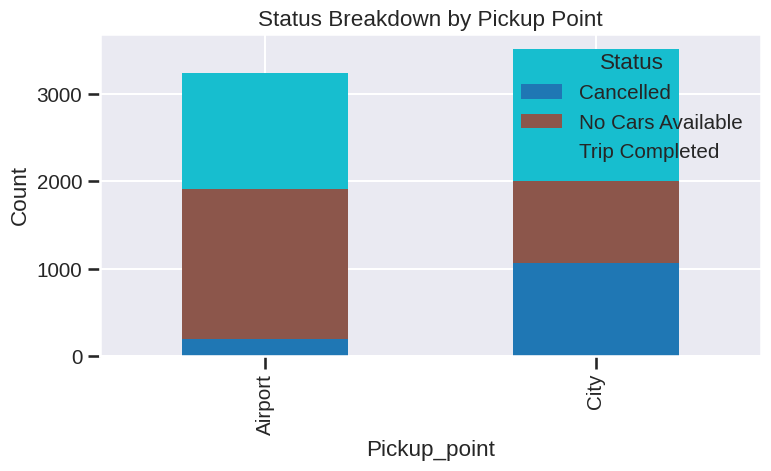

In [ ]:
# Chart - 17 visualization code
#Pickup Point-wise Status Distribution (Stacked Bar)

pickup_status = df.groupby(['Pickup_point', 'Status']).size().unstack(fill_value=0)

pickup_status.plot(kind='bar', stacked=True, figsize=(8,5), colormap='tab10')
plt.title("Status Breakdown by Pickup Point")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

I chose this chart because it compares the performance and challenges of different pickup points (Airport vs City) in terms of service fulfillment. It provides a segmented view of trip outcomes that can directly inform operational improvements.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we see that:

*   Airport has a high number of "No Cars Available" issues.

*   City has more "Cancelled" trips compared to the Airport.

*   Trip Completed counts are relatively balanced, but the failure modes differ significantly between the two points.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help tailor location-specific strategies—like increasing vehicle availability at the Airport and improving cancellation handling in the City. Ignoring these issues could lead to negative growth, as customers might lose trust in reliability at their respective pickup points, especially if frequent cancellations or unavailability persist.

#### Chart - 18 : Top 10 Drivers by Completion Rate with most Cancelled Pickup Point


/tmp/ipython-input-30-3255103904.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




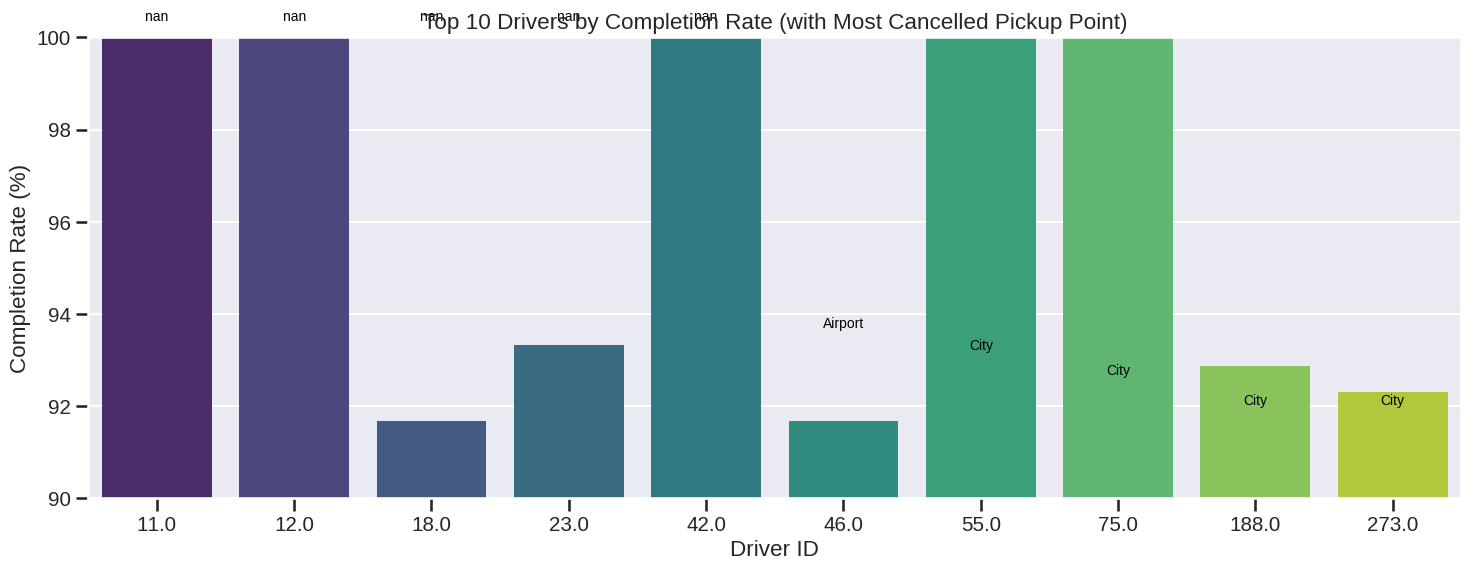

In [ ]:
# Chart - 18 visualization code
# Calculate total and completed requests per driver
driver_perf = df[df['Driver_id'].notnull()].groupby('Driver_id').agg(
    total_requests=('Status', 'count'),
    completed_requests=('Status', lambda x: (x == 'Trip Completed').sum())
)

# Compute completion rate and filter drivers with at least 5 requests
driver_perf['completion_rate'] = 100 * driver_perf['completed_requests'] / driver_perf['total_requests']
driver_perf = driver_perf[driver_perf['total_requests'] >= 5]

# Get top 10 drivers by completion rate and total requests
top_drivers = driver_perf.sort_values(by=['completion_rate', 'total_requests'], ascending=[False, False]).head(10).reset_index()

# Get pickup point where each top driver cancels the most
cancel_df = df[(df['Status'] == 'Cancelled') & (df['Driver_id'].isin(top_drivers['Driver_id']))]
cancel_counts = cancel_df.groupby(['Driver_id', 'Pickup_point']).size().reset_index(name='cancel_count')
top_cancel_pickup = cancel_counts.sort_values(['Driver_id', 'cancel_count'], ascending=[True, False]).drop_duplicates('Driver_id')

# Add most cancelled pickup point to top drivers
top_drivers = top_drivers.merge(top_cancel_pickup[['Driver_id', 'Pickup_point']], on='Driver_id', how='left')
top_drivers.rename(columns={'Pickup_point': 'Most_Cancelled_Pickup'}, inplace=True)

# Count cancellations at each pickup point for top drivers
cancel_summary = cancel_df.groupby(['Driver_id', 'Pickup_point']).size().unstack(fill_value=0)
cancel_summary = cancel_summary.rename(columns={
    'Airport': 'Airport_Cancellations',
    'City': 'City_Cancellations'
}).reset_index()

# Merge cancellation details into top drivers table
top_drivers = top_drivers.merge(cancel_summary, on='Driver_id', how='left')

# Fill missing cancellation counts with 0 and convert to integers
top_drivers[['Airport_Cancellations', 'City_Cancellations']] = top_drivers[['Airport_Cancellations', 'City_Cancellations']].fillna(0).astype(int)


# Bar plot of top 10 drivers by completion rate, annotated with most cancelled pickup point
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=top_drivers, x='Driver_id', y='completion_rate', palette='viridis')

# Annotate each bar with the pickup point where the driver cancels the most
for index, row in top_drivers.iterrows():
    ax.text(index, row['completion_rate'] + 0.3, row['Most_Cancelled_Pickup'],
            ha='center', va='bottom', fontsize=10, color='black')

plt.title('Top 10 Drivers by Completion Rate (with Most Cancelled Pickup Point)')
plt.ylabel('Completion Rate (%)')
plt.xlabel('Driver ID')
plt.ylim(90, 100)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

I picked this chart because it helps identify top-performing drivers based on trip completion rate and links their performance to specific pickup points. It’s valuable for driver-level performance evaluation and operational improvements.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that some drivers (e.g., IDs 11, 12, 42, 55, 75) have near-perfect completion rates, even in high-cancellation areas like the City or Airport. However, others like IDs 18, 46, and 273 have lower completion rates, mostly associated with the City pickup point.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, recognizing high-performing drivers can aid in incentivizing and training others, boosting service reliability. Conversely, the presence of drivers with poor performance at busy locations like the City could hurt brand trust and customer retention if not addressed through training or resource reallocation

#### Chart - 19 : Top 10 Drivers with Most Requests: Completed vs Cancelled

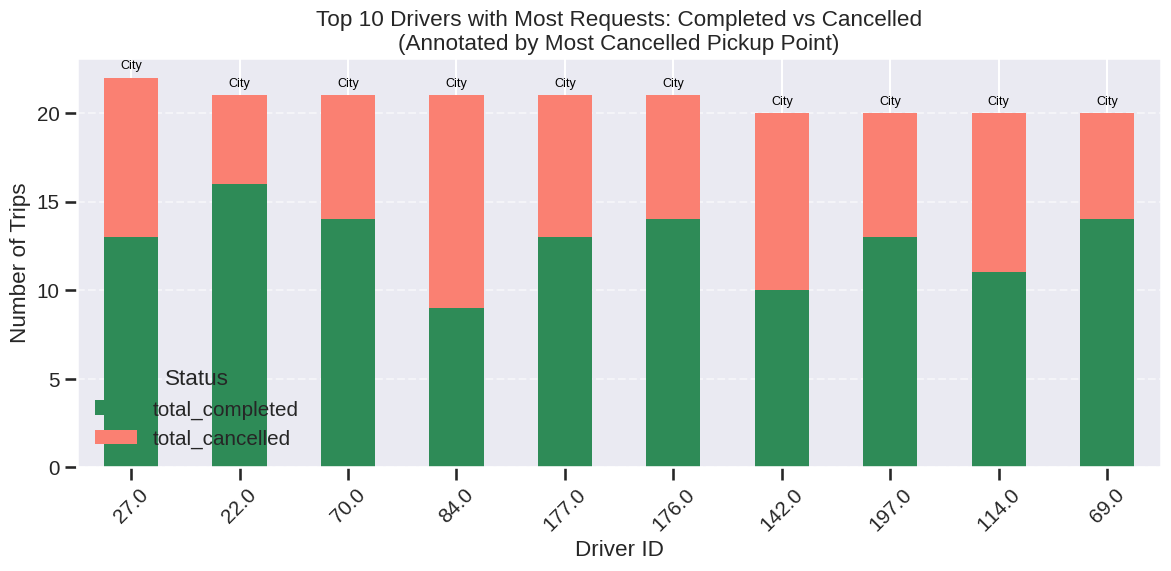

In [ ]:
# Chart - 19 visualization code
# Filter out trips with valid driver IDs
driver_df = df[df['Driver_id'].notnull()].copy()

# Group by driver and calculate total, completed, and cancelled requests
driver_summary = driver_df.groupby('Driver_id').agg(
    total_requests=('Status', 'count'),
    total_completed=('Status', lambda x: (x == 'Trip Completed').sum()),
    total_cancelled=('Status', lambda x: (x == 'Cancelled').sum())
)

# Select top 10 drivers based on total number of requests
top_drivers = driver_summary.sort_values(by='total_requests', ascending=False).head(10)

# Determine most cancelled pickup point for each top driver
cancel_df = df[(df['Status'] == 'Cancelled') & (df['Driver_id'].isin(top_drivers.index))]
pickup_cancel = cancel_df.groupby(['Driver_id', 'Pickup_point']).size().reset_index(name='cancel_count')
pickup_top = pickup_cancel.sort_values(['Driver_id', 'cancel_count'], ascending=[True, False]).drop_duplicates('Driver_id')

# Merge most cancelled pickup info into top driver summary
top_drivers = top_drivers.reset_index()
top_drivers = top_drivers.merge(pickup_top[['Driver_id', 'Pickup_point']], on='Driver_id', how='left')
top_drivers.set_index('Driver_id', inplace=True)

# Plot stacked bar chart of completed vs cancelled trips per driver
ax = top_drivers[['total_completed', 'total_cancelled']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['seagreen', 'salmon']
)

# Annotate bars with most cancelled pickup point
for idx, row in enumerate(top_drivers.itertuples()):
    annotation = row.Pickup_point if pd.notnull(row.Pickup_point) else 'N/A'
    ax.text(idx, row.total_requests + 0.5, annotation, ha='center', fontsize=9, color='black')

plt.title("Top 10 Drivers with Most Requests: Completed vs Cancelled\n(Annotated by Most Cancelled Pickup Point)")
plt.xlabel("Driver ID")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

I chose this stacked bar chart because it clearly compares the number of trips completed versus cancelled for the top 10 drivers with the most requests. The split by status (completed and cancelled) highlights operational efficiency issues at a glance. Additionally, annotating with the pickup point (“City”) adds context about possible location-based factors. This visualization is simple yet effective for identifying driver-level trends.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that some drivers have a high number of cancellations compared to completions. For example, Driver ID 27 has nearly equal completed and cancelled trips, indicating potential reliability issues. The consistent pickup point “City” suggests that cancellations might be driven by urban congestion or coordination challenges. Identifying drivers with unusually high cancellations can help target improvement efforts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive impact by helping the business address driver performance or location-specific problems, improving completion rates and customer satisfaction. However, if not managed well, identifying high cancellation rates could also reveal systemic issues like traffic or unrealistic driver schedules, which may temporarily highlight negative aspects. Addressing these problems proactively prevents long-term negative growth and optimizes resource allocation.

#### Chart - 20 : Top 10 Drivers with Most Cancellations and Pickup Pattern

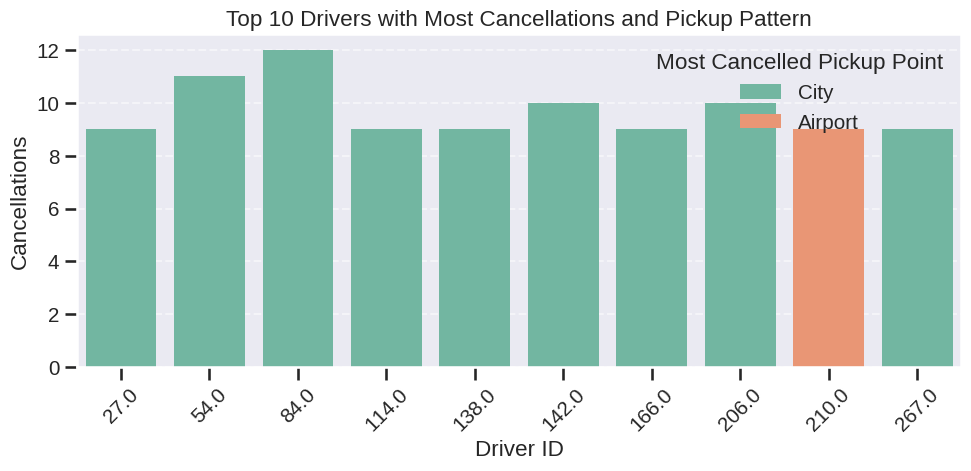

In [ ]:
# Chart - 20 visualization code
# Filter out only cancelled trips with valid driver IDs
cancelled_df = df[(df['Status'] == 'Cancelled') & (df['Driver_id'].notnull())].copy()
driver_df = df[df['Driver_id'].notnull()].copy()

# Total cancellations per driver
driver_cancel_count = cancelled_df.groupby('Driver_id').size().reset_index(name='Total_Cancellations')

# Identify most cancelled pickup point for each driver
pickup_cancel = cancelled_df.groupby(['Driver_id', 'Pickup_point']).size().reset_index(name='Count')
most_cancelled_pickup = pickup_cancel.loc[pickup_cancel.groupby('Driver_id')['Count'].idxmax()].rename(columns={'Pickup_point': 'Most_Cancelled_Pickup'})

# Total number of requests per driver
total_requests = driver_df.groupby('Driver_id').size().reset_index(name='Total_Requests')

# Cancellations by pickup point (Airport & City)
airport_cancels = cancelled_df[cancelled_df['Pickup_point'] == 'Airport'].groupby('Driver_id').size().reset_index(name='Airport_Cancellations')
city_cancels = cancelled_df[cancelled_df['Pickup_point'] == 'City'].groupby('Driver_id').size().reset_index(name='City_Cancellations')

# Merge all data into a cancellation summary
cancel_summary = driver_cancel_count \
    .merge(most_cancelled_pickup[['Driver_id', 'Most_Cancelled_Pickup']], on='Driver_id', how='left') \
    .merge(total_requests, on='Driver_id', how='left') \
    .merge(airport_cancels, on='Driver_id', how='left') \
    .merge(city_cancels, on='Driver_id', how='left')

# Fill missing cancellation counts with 0 and convert to int
cancel_summary[['Airport_Cancellations', 'City_Cancellations']] = cancel_summary[['Airport_Cancellations', 'City_Cancellations']].fillna(0).astype(int)

# Select top 10 drivers with the highest number of cancellations
top_cancel_drivers = cancel_summary.sort_values(by='Total_Cancellations', ascending=False).head(10)

# Plot bar chart showing total cancellations per driver with hue for most cancelled pickup point
plt.figure(figsize=(10, 5))
sns.barplot(data=top_cancel_drivers, x='Driver_id', y='Total_Cancellations', hue='Most_Cancelled_Pickup', palette='Set2')
plt.title("Top 10 Drivers with Most Cancellations and Pickup Pattern")
plt.xlabel("Driver ID")
plt.ylabel("Cancellations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Most Cancelled Pickup Point")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I picked this chart because it focuses specifically on the drivers with the highest number of cancellations and highlights their most common pickup points. This helps isolate cancellation patterns to see if they are driver-related or location-specific. Using color to differentiate “City” vs. “Airport” pickup points adds another layer of actionable insight. It’s a clear way to pinpoint operational pain areas.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that most cancellations happen at the “City” pickup point, with only one driver (ID 210) showing high cancellations at the “Airport.” This indicates that urban areas might face more cancellations due to factors like traffic or delays. Also, Driver ID 84 stands out with the highest cancellations, signaling a potential performance or scheduling issue for that driver.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights will help the business focus on high-cancellation drivers and tackle specific location challenges. Solving urban pickup inefficiencies can boost completion rates and customer trust. However, the high number of city-based cancellations suggests a recurring issue that could hurt growth if ignored. Addressing root causes now will prevent future loss of riders and revenue.

#### Chart - 21 : Long Trip % vs Pickupoint Cancellations

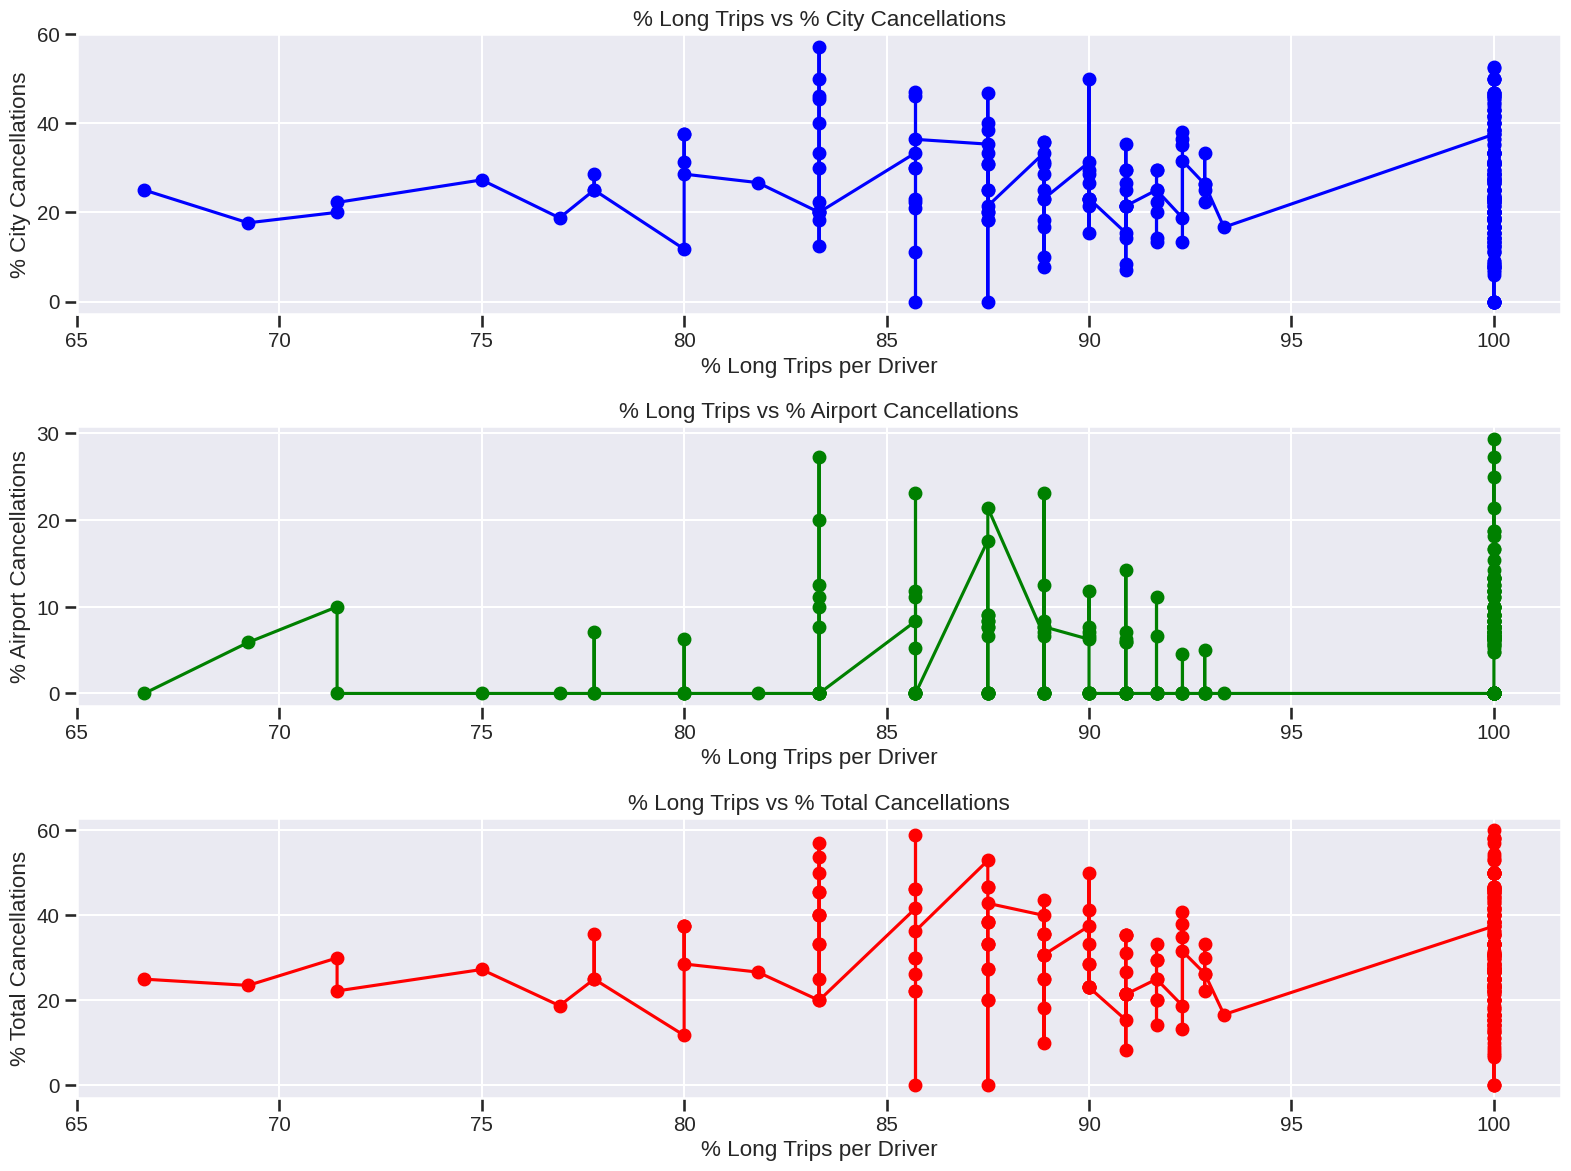

Correlation (Long Trip % vs City Cancel %): -0.036307510443604245
Correlation (Long Trip % vs Airport Cancel %): 0.06798176966068967
Correlation (Long Trip % vs Total Cancel %): -0.0015324069512500928


In [ ]:
# Chart - 21 visualization code
# Convert timestamps to datetime
df['Request_timestamp'] = pd.to_datetime(df['Request_timestamp'], errors='coerce')
df['Drop_timestamp'] = pd.to_datetime(df['Drop_timestamp'], errors='coerce')

# Filter rows with valid drivers
driver_df = df[df['Driver_id'].notnull()].copy()

# Calculate trip duration in minutes
driver_df['Trip_duration_min'] = (driver_df['Drop_timestamp'] - driver_df['Request_timestamp']).dt.total_seconds() / 60

# Flag long trips (> 30 minutes and completed)
driver_df['is_long_trip'] = (driver_df['Status'] == 'Trip Completed') & (driver_df['Trip_duration_min'] > 30)

# Group and calculate metrics
summary = driver_df.groupby('Driver_id').agg(
    total_requests=('Request_id', 'count'),
    total_completed=('Status', lambda x: (x == 'Trip Completed').sum()),
    airport_long_trips=('is_long_trip', lambda x: (x & (driver_df.loc[x.index, 'Pickup_point'] == 'Airport')).sum()),
    city_long_trips=('is_long_trip', lambda x: (x & (driver_df.loc[x.index, 'Pickup_point'] == 'City')).sum()),
    airport_cancellations=('Status', lambda x: ((x == 'Cancelled') & (driver_df.loc[x.index, 'Pickup_point'] == 'Airport')).sum()),
    city_cancellations=('Status', lambda x: ((x == 'Cancelled') & (driver_df.loc[x.index, 'Pickup_point'] == 'City')).sum())
).reset_index()


# Compute percentages
summary['long_trip_percent'] = 100 * (summary['airport_long_trips'] + summary['city_long_trips']) / summary['total_completed']
summary['city_cancel_percent'] = 100 * summary['city_cancellations'] / summary['total_requests']
summary['airport_cancel_percent'] = 100 * summary['airport_cancellations'] / summary['total_requests']
summary['total_cancel_percent'] = 100 * (summary['airport_cancellations'] + summary['city_cancellations']) / summary['total_requests']


# Sort for cleaner X-axis
summary = summary.sort_values(by='long_trip_percent')

# Plotting
plt.figure(figsize=(16, 12))

# Plot 1: City Cancel vs Long Trips
plt.subplot(3, 1, 1)
plt.plot(summary['long_trip_percent'], summary['city_cancel_percent'], marker='o', color='blue')
plt.title("% Long Trips vs % City Cancellations")
plt.xlabel("% Long Trips per Driver")
plt.ylabel("% City Cancellations")
plt.grid(True)

# Plot 2: Airport Cancel vs Long Trips
plt.subplot(3, 1, 2)
plt.plot(summary['long_trip_percent'], summary['airport_cancel_percent'], marker='o', color='green')
plt.title("% Long Trips vs % Airport Cancellations")
plt.xlabel("% Long Trips per Driver")
plt.ylabel("% Airport Cancellations")
plt.grid(True)

# Plot 3: Total Cancel vs Long Trips
plt.subplot(3, 1, 3)
plt.plot(summary['long_trip_percent'], summary['total_cancel_percent'], marker='o', color='red')
plt.title("% Long Trips vs % Total Cancellations")
plt.xlabel("% Long Trips per Driver")
plt.ylabel("% Total Cancellations")
plt.grid(True)

plt.tight_layout()
plt.show()

#Show correlation
print("Correlation (Long Trip % vs City Cancel %):", summary['long_trip_percent'].corr(summary['city_cancel_percent']))
print("Correlation (Long Trip % vs Airport Cancel %):", summary['long_trip_percent'].corr(summary['airport_cancel_percent']))
print("Correlation (Long Trip % vs Total Cancel %):", summary['long_trip_percent'].corr(summary['total_cancel_percent']))

##### 1. Why did you pick the specific chart?

I picked this multi-line plot because it examines the relationship between the percentage of long trips per driver and their cancellation rates, segmented by City, Airport, and Total cancellations. This helps test whether trip length influences cancellations at different pickup points. The layout is clear and makes it easy to compare trends side by side. Such a chart is valuable for spotting operational inefficiencies linked to trip patterns.

##### 2. What is/are the insight(s) found from the chart?

The charts show that as the percentage of long trips increases, cancellation rates remain scattered with no strong downward trend. City cancellations stay relatively high for drivers with high long-trip percentages. Airport cancellations are generally lower and more stable. This suggests that long trips alone don’t significantly reduce cancellations and that urban pickups still face high cancellation risks.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights will help the business see that focusing only on increasing long trips may not fix the cancellation issue, especially in cities. Targeted measures for urban pickups are needed to address driver or routing inefficiencies. Without action, high cancellation rates for long city trips could lead to lost revenue and dissatisfied customers, negatively affecting growth. Proactive strategies will convert these insights into positive impact.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To bridge the supply-demand gap, especially during peak time slots like Morning, Evening, and Night, the company should optimize fleet allocation and driver availability based on historical request patterns. This can be done by dynamically scheduling drivers and incentivizing them to be active during high-demand periods.

Location-wise, Airport pickups suffer from availability issues, while City pickups face high cancellations, especially during traffic-prone hours. The business should focus on increasing driver availability at the Airport and implementing driver support, route planning, or cancellation penalties in the City to improve reliability.

Driver-level analysis showed that a small set of drivers contribute to most cancellations, especially in cities. By identifying, retraining, or reassigning such drivers, service quality can be improved. Conversely, top-performing drivers should be rewarded and used as benchmark models for training others.

Although long trips are often completed successfully, they do not directly reduce cancellations, especially for City pickups. Hence, longer trips alone shouldn't be the focus—instead, address root causes like traffic, waiting times, or unclear pickup points.

Finally, dashboards in Excel and summary charts indicate that customer churn risk is high if unfulfilled and cancelled requests are ignored. By taking a data-driven, time-slot-specific, and location-aware approach, the client can enhance completion rates, improve rider trust, and ultimately boost revenue.

# **Conclusion**

The analysis reveals significant supply-demand mismatches during peak hours, especially in the Morning, Evening, and Night time slots. City pickups suffer from high cancellation rates, while Airport pickups face frequent unavailability. Specific drivers contribute disproportionately to cancellations, suggesting the need for targeted training and resource reallocation. Long trips do not directly reduce cancellation risks, especially in urban areas. Addressing time-slot and location-specific issues, improving driver performance, and incentivizing high-demand coverage can enhance service reliability. Implementing these insights will help the client boost customer satisfaction, optimize fleet efficiency, and drive sustainable business growth.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***